# NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044
---- 
# MODEL : RANDOM FOREST <BR>DATASET : [BILLIONARE STATISTICS DATASET](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/code) <BR>METODE   : REGRESI 

In [19]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [22]:
df = pd.read_csv("Billionaires Statistics Dataset.csv")

In [23]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [26]:
# Menghitung jumlah data kosong pada setiap kolom
jumlah_data_kosong = df.isnull().sum()
jumlah_data_kosong_total = df.isnull().sum().sum()

# Menampilkan hasil
print("Jumlah data kosong pada setiap kolom:")
print(jumlah_data_kosong)
print("Jumlah data kosong total:", jumlah_data_kosong_total)

Jumlah data kosong pada setiap kolom:
rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                        

In [27]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [28]:
df.mean()

C:\Users\agung\AppData\Local\Temp\ipykernel_15992\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


rank                                          1.289159e+03
finalWorth                                    4.623788e+03
age                                           6.514019e+01
selfMade                                      6.863636e-01
birthYear                                     1.957183e+03
birthMonth                                    5.740250e+00
birthDay                                      1.209984e+01
cpi_country                                   1.277552e+02
cpi_change_country                            4.364169e+00
gross_tertiary_education_enrollment           6.722567e+01
gross_primary_education_enrollment_country    1.028585e+02
life_expectancy_country                       7.812282e+01
tax_revenue_country_country                   1.254624e+01
total_tax_rate_country                        4.396334e+01
population_country                            5.102053e+08
latitude_country                              3.490359e+01
longitude_country                             1.258316e+

In [29]:
df.std()

C:\Users\agung\AppData\Local\Temp\ipykernel_15992\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


rank                                          7.396937e+02
finalWorth                                    9.834241e+03
age                                           1.325810e+01
selfMade                                      4.640584e-01
birthYear                                     1.328252e+01
birthMonth                                    3.710085e+00
birthDay                                      9.918876e+00
cpi_country                                   2.645295e+01
cpi_change_country                            3.623763e+00
gross_tertiary_education_enrollment           2.134343e+01
gross_primary_education_enrollment_country    4.710977e+00
life_expectancy_country                       3.730099e+00
tax_revenue_country_country                   5.368625e+00
total_tax_rate_country                        1.214530e+01
population_country                            5.542447e+08
latitude_country                              1.700350e+01
longitude_country                             8.676299e+

In [31]:
result = df.groupby('country')['industries'].value_counts()
result

country                   industries                
Algeria                   Food & Beverage                 1
Andorra                   Manufacturing                   1
Argentina                 Diversified                     1
                          Energy                          1
                          Real Estate                     1
                          Technology                      1
Armenia                   Finance & Investments           1
Australia                 Metals & Mining                 8
                          Real Estate                     8
                          Technology                      8
                          Fashion & Retail                6
                          Manufacturing                   4
                          Finance & Investments           2
                          Food & Beverage                 2
                          Diversified                     1
                          Energy               

In [33]:
df.groupby('industries')['finalWorth'].mean().sort_values(ascending=False)

industries
Automotive                    7195.890411
Telecom                       6564.516129
Fashion & Retail              6386.466165
Metals & Mining               6037.837838
Logistics                     5987.500000
Technology                    5980.573248
Diversified                   4840.641711
Gambling & Casinos            4820.000000
Media & Entertainment         4697.802198
Energy                        4535.000000
Food & Beverage               4515.094340
Finance & Investments         4314.784946
Sports                        3448.717949
Real Estate                   3406.217617
Service                       3271.698113
Healthcare                    3200.000000
Manufacturing                 3145.061728
Construction & Engineering    2633.333333
Name: finalWorth, dtype: float64

In [34]:
df.groupby('industries')['finalWorth'].std().sort_values(ascending=False)

industries
Automotive                    21467.025349
Telecom                       16513.379391
Fashion & Retail              16384.139970
Technology                    14040.592851
Media & Entertainment         11215.118546
Diversified                    9722.922456
Logistics                      8611.417213
Metals & Mining                7301.129631
Food & Beverage                7158.149731
Gambling & Casinos             6943.462153
Finance & Investments          6927.454012
Energy                         4801.038924
Manufacturing                  3466.470131
Real Estate                    3359.216596
Healthcare                     3274.385439
Service                        3166.979716
Sports                         3041.283645
Construction & Engineering     2176.423254
Name: finalWorth, dtype: float64

In [35]:
df.groupby('industries')['finalWorth'].sum().sort_values(ascending=False)

industries
Technology                    1877900
Fashion & Retail              1698800
Finance & Investments         1605100
Manufacturing                 1019000
Food & Beverage                957200
Diversified                    905200
Real Estate                    657400
Healthcare                     643200
Automotive                     525300
Energy                         453500
Metals & Mining                446800
Media & Entertainment          427500
Logistics                      239500
Telecom                        203500
Service                        173400
Sports                         134500
Gambling & Casinos             120500
Construction & Engineering     118500
Name: finalWorth, dtype: int64

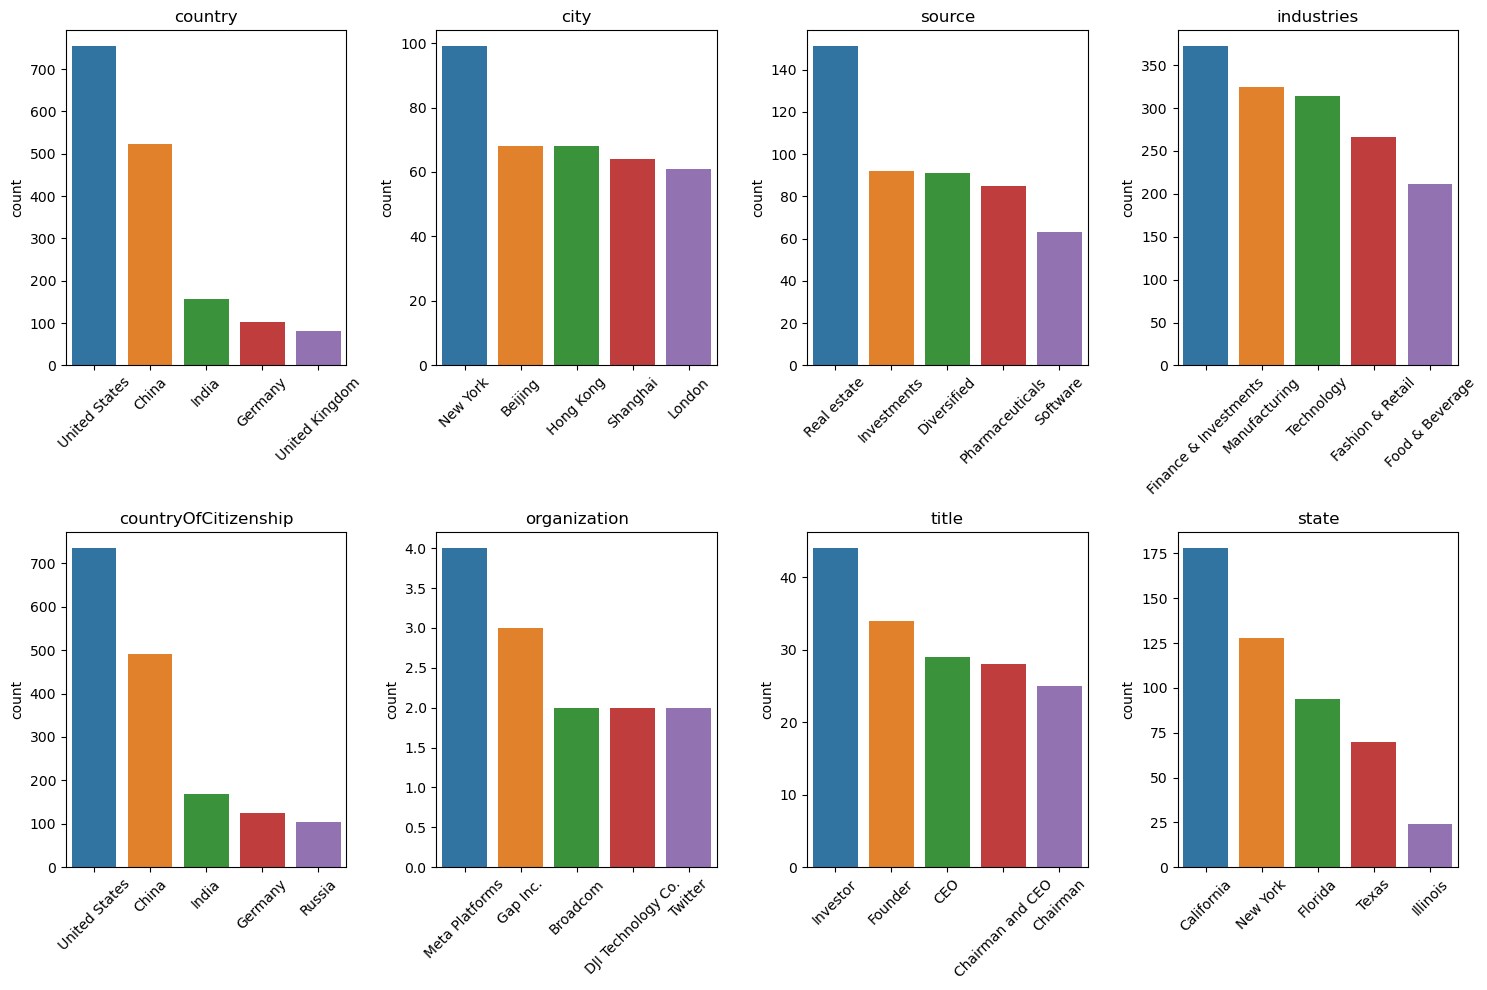

In [36]:
# Daftar kolom kategorikal yang akan divisualisasikan
cat_col = ['country', 'city', 'source', 'industries', 'countryOfCitizenship', 'organization', 'title', 'state']

# Menentukan jumlah kolom dan baris dalam subplot
num_cols = 4
num_rows = 2
total_plots = num_cols * num_rows

# Membuat objek subplot dan menetapkan ukuran gambar
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterasi melalui kolom kategorikal dan menggambar subplot untuk masing-masing kolom
for idx, col in enumerate(cat_col[:total_plots]):
    # Mendapatkan indeks baris dan kolom untuk subplot
    ax = axes[idx // num_cols, idx % num_cols]
    
    # Menetapkan judul subplot
    ax.set_title(f'{col}')
    
    # Mengambil lima nilai teratas dan menghitung frekuensinya
    col_df = df[col].value_counts().reset_index()[:5]
    
    # Membuat barplot dengan seaborn
    sns.barplot(data=col_df, x='index', y=col, ax=ax)
    
    # Menyembunyikan label sumbu x untuk memperbaiki tata letak
    ax.set_xlabel('')
    
    # Menetapkan label sumbu y
    ax.set_ylabel('count')
    
    # Rotasi label sumbu x untuk meningkatkan keterbacaan
    ax.tick_params(axis='x', rotation=45) 

# Menyesuaikan tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


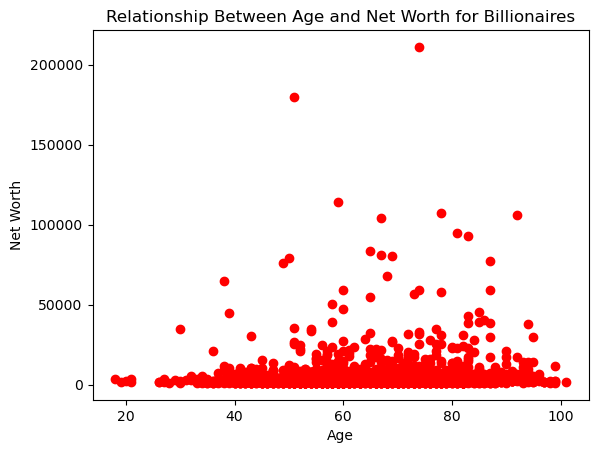

In [41]:
filters = df[(df['age'] >= 0) & (df['finalWorth'] > 0)]

plt.scatter(filters['age'], filters['finalWorth'], color='red')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Relationship Between Age and Net Worth for Billionaires')
plt.show()

In [42]:
# Calculate the average final worth of billionaires for each year
average_final_worth_by_year = df.groupby('age')['finalWorth'].mean()

average_final_worth_by_year.head()

age
18.0    3500.0
19.0    1700.0
20.0    2300.0
21.0    2600.0
26.0    1450.0
Name: finalWorth, dtype: float64

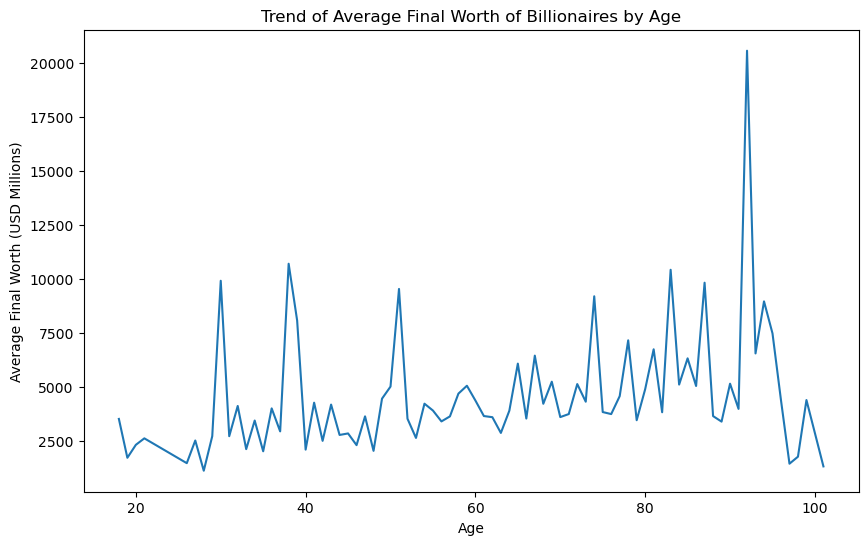

In [43]:
# Create a line chart showing the trend of the average final worth of billionaires over time
plt.figure(figsize=(10, 6))
plt.plot(average_final_worth_by_year.index, average_final_worth_by_year.values)
plt.title('Trend of Average Final Worth of Billionaires by Age')
plt.xlabel('Age')
plt.ylabel('Average Final Worth (USD Millions)')
plt.show()

[Text(0.5, 0, 'Final Worth'), Text(0, 0.5, 'Industry')]

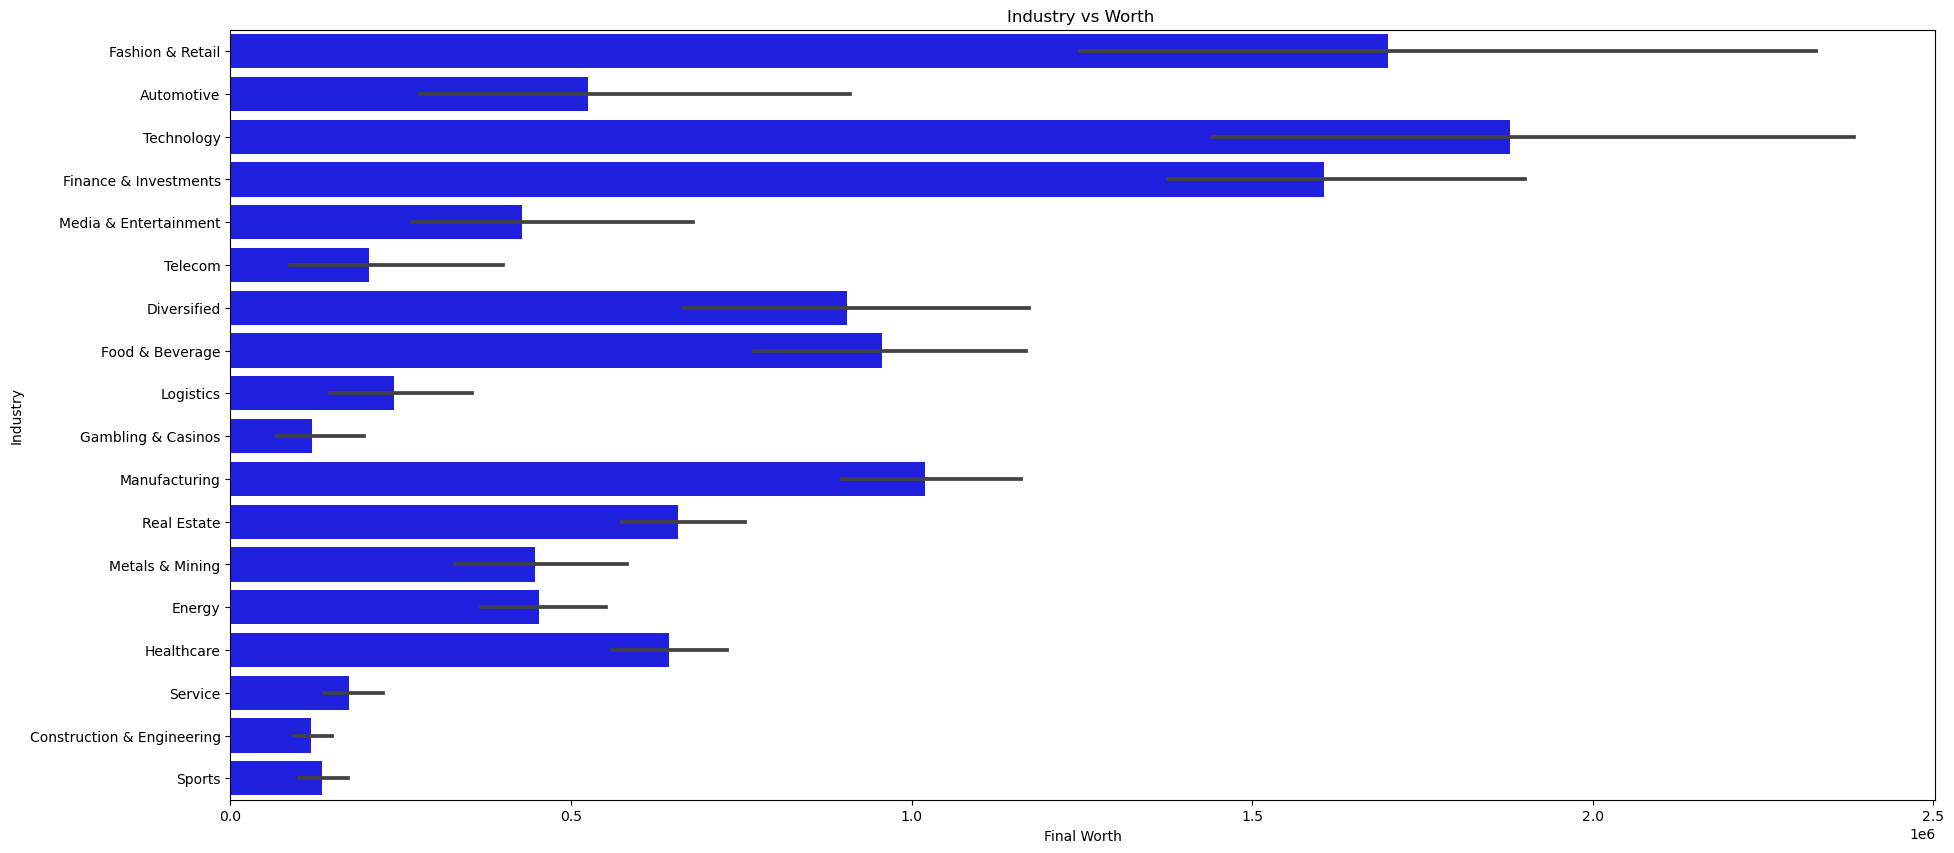

In [44]:
# Membuat objek gambar (figure) dengan ukuran 22x10 inci
x = plt.figure(figsize=(22, 10))

# Membuat barplot menggunakan seaborn
ax = sns.barplot(
    y=df["industries"],       # Variabel di sumbu y, dalam hal ini, kolom 'industries' dari DataFrame df
    x=df["finalWorth"],       # Variabel di sumbu x, dalam hal ini, kolom 'finalWorth' dari DataFrame df
    estimator=sum,            # Menggunakan estimator sum untuk menghitung nilai agregat (total) pada sumbu y
    color="b"                 # Warna batang diagram (blue)
)

# Menetapkan judul pada plot
ax.set_title('Industry vs Worth ')

# Menetapkan label sumbu x dan sumbu y
ax.set(xlabel='Final Worth', ylabel='Industry')


C:\Users\agung\AppData\Local\Temp\ipykernel_15992\2394912450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

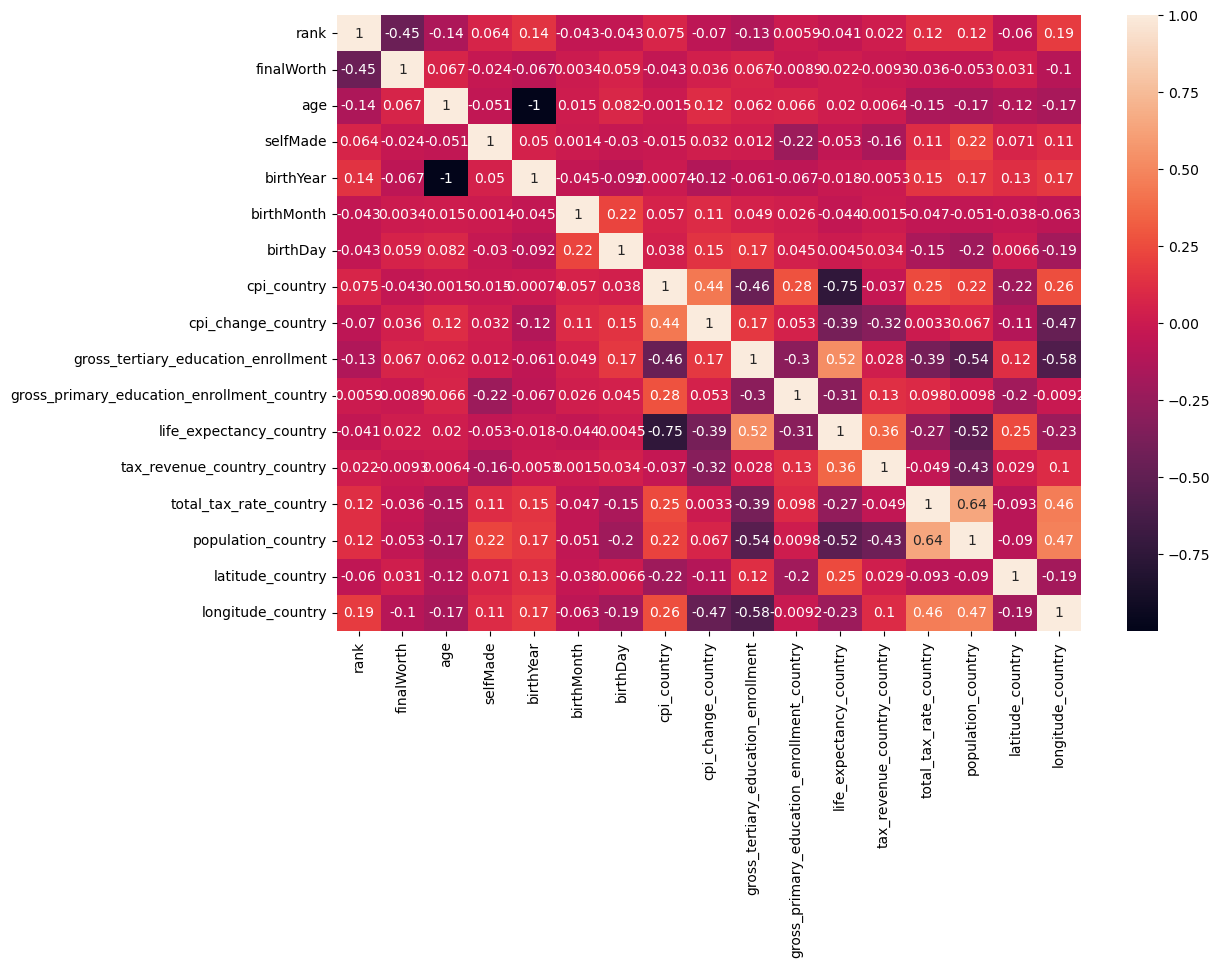

In [45]:
# Get the correlation matrix of the numerical columns
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, ax=ax)

In [54]:
df['selfMade'] = df['selfMade'].astype(int)

In [47]:
# Memisahkan target (y) dan fitur (X)
y = df['finalWorth']
X = df.drop(['rank', 'finalWorth'], axis=1)

# Menghapus kolom-kolom yang tidak akan digunakan sebagai fitur
X = X.drop(["source", "industries", "organization", 'title','state',
            'residenceStateRegion',"city", "birthDate",'birthMonth', 'birthDay', 
            'lastName', 'firstName', 'birthYear', 'date', 'latitude_country',
            'longitude_country', 'personName', 'gdp_country'], axis = 1)

X.head()

,category,age,country,countryOfCitizenship,selfMade,status,gender,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
0,Fashion & Retail,74.0,France,France,False,U,M,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887.0
1,Automotive,51.0,United States,United States,True,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
2,Technology,59.0,United States,United States,True,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
3,Technology,78.0,United States,United States,True,U,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
4,Finance & Investments,92.0,United States,United States,True,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0


In [48]:
X = X.rename(columns={
    'countryOfCitizenship': 'Citizenship',
    'selfMade': 'Self Made',
    'cpi_change_country': 'CPI Change',
    'cpi_country': 'CPI',
    'gross_tertiary_education_enrollment': 'Gross Tertiary Education',
    'gross_primary_education_enrollment_country': 'Gross Primary Education',
    'life_expectancy_country': 'Life Expectancy',
    'tax_revenue_country_country': 'Tax Revenue',
    'total_tax_rate_country': 'Total Tax',	
    'population_country': 'Population'
})

X.head()

,category,age,country,Citizenship,Self Made,status,gender,CPI,CPI Change,Gross Tertiary Education,Gross Primary Education,Life Expectancy,Tax Revenue,Total Tax,Population
0,Fashion & Retail,74.0,France,France,False,U,M,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887.0
1,Automotive,51.0,United States,United States,True,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
2,Technology,59.0,United States,United States,True,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
3,Technology,78.0,United States,United States,True,U,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
4,Finance & Investments,92.0,United States,United States,True,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0


In [56]:
print(X.dtypes)

category                     object
age                         float64
country                      object
Citizenship                  object
Self Made                      bool
status                       object
gender                       object
CPI                         float64
CPI Change                  float64
Gross Tertiary Education    float64
Gross Primary Education     float64
Life Expectancy             float64
Tax Revenue                 float64
Total Tax                   float64
Population                  float64
dtype: object


In [59]:
# Membuat kamus kosong untuk menyimpan objek LabelEncoder
label_encoders = {}

# Daftar kolom lain yang akan dilabeli
features_to_encode = ['country', 'Citizenship', 'Self Made', 'status', 'category', 'gender']

# Iterasi melalui kolom-kolom lain yang akan dilabeli
for feature in features_to_encode:
    # Membuat objek LabelEncoder
    le = LabelEncoder()
    
    # Melakukan label encoding pada kolom dan menyimpannya di DataFrame
    X[feature] = le.fit_transform(X[feature])
    
    # Menyimpan objek LabelEncoder ke dalam kamus
    label_encoders[feature] = le


# Hasil data yang telah di-preprocess
X.head()

,category,age,country,Citizenship,Self Made,status,gender,CPI,CPI Change,Gross Tertiary Education,Gross Primary Education,Life Expectancy,Tax Revenue,Total Tax,Population
0,4,74.0,24,22,0,5,1,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887.0
1,0,51.0,74,73,1,0,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
2,16,59.0,74,73,1,0,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
3,16,78.0,74,73,1,5,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0
4,5,92.0,74,73,1,0,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523.0


In [60]:
# Menghitung nilai NaN dalam setiap kolom
jumlah_nan_per_kolom = X.isna().sum()

# Menghitung total nilai NaN dalam seluruh DataFrame
total_nan = X.isna().sum().sum()

print("Jumlah NaN per kolom:")
print(jumlah_nan_per_kolom)

print("\nTotal NaN dalam DataFrame:", total_nan)

Jumlah NaN per kolom:
category                      0
age                          65
country                       0
Citizenship                   0
Self Made                     0
status                        0
gender                        0
CPI                         184
CPI Change                  184
Gross Tertiary Education    182
Gross Primary Education     181
Life Expectancy             182
Tax Revenue                 183
Total Tax                   182
Population                  164
dtype: int64

Total NaN dalam DataFrame: 1507


In [61]:
X = X.fillna(X.mean())

In [62]:
# Menghitung nilai NaN dalam setiap kolom
jumlah_nan_per_kolom = X.isna().sum()

# Menghitung total nilai NaN dalam seluruh DataFrame
total_nan = X.isna().sum().sum()

print("Jumlah NaN per kolom:")
print(jumlah_nan_per_kolom)

print("\nTotal NaN dalam DataFrame:", total_nan)

Jumlah NaN per kolom:
category                    0
age                         0
country                     0
Citizenship                 0
Self Made                   0
status                      0
gender                      0
CPI                         0
CPI Change                  0
Gross Tertiary Education    0
Gross Primary Education     0
Life Expectancy             0
Tax Revenue                 0
Total Tax                   0
Population                  0
dtype: int64

Total NaN dalam DataFrame: 0


In [63]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2112, 15)
X_test shape: (528, 15)
y_train shape: (2112,)
y_test shape: (528,)


In [64]:
# Melatih model RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
# Mendapatkan feature importance dari model
feature_importances = rf.feature_importances_

# Membuat DataFrame untuk menampilkan feature importance
importance_df_RF = pd.DataFrame({'Fitur': X.columns, 'Importance': feature_importances})

# Mengurutkan fitur berdasarkan importance
importance_df_RF = importance_df_RF.sort_values(by='Importance', ascending=False)

# Menampilkan 5 fitur teratas
top_5_features = importance_df_RF.head(5)

print("5 fitur teratas:")
print(top_5_features)

5 fitur teratas:
         Fitur  Importance
1          age    0.476494
0     category    0.190343
5       status    0.075887
4    Self Made    0.047081
3  Citizenship    0.036728


In [66]:
# Menghitung Mean Absolute Error untuk data pelatihan
y_train_pred = rf.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Menghitung Mean Absolute Error untuk data uji
y_test_pred = rf.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Menampilkan hasil Mean Absolute Error untuk data pelatihan dan uji
print(f'MAE on Training Data: {mae_train}')
print(f'MAE on Test Data: {mae_test}')

MAE on Training Data: 1909.758007154882
MAE on Test Data: 3656.0254224468717


In [67]:
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [69]:
# Menghitung Mean Absolute Error untuk data pelatihan
y_train_pred = best_rf.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Menghitung Mean Absolute Error untuk data uji
y_test_pred = best_rf.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Menampilkan hasil Mean Absolute Error untuk data pelatihan dan uji
print(f'MAE on Training Data: {mae_train}')
print(f'MAE on Test Data: {mae_test}')

MAE on Training Data: 2643.3356723766838
MAE on Test Data: 3302.9009237613245


In [70]:
# Memperluas ruang pencarian parameter
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menambahkan beberapa metrik evaluasi tambahan
scoring = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error'}

# Mencoba GridSearchCV dengan ruang parameter yang diperluas dan metrik evaluasi tambahan
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring=scoring, cv=5, refit='MAE')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Menampilkan parameter terbaik dan nilai terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MAE:", grid_search.best_score_)

# Evaluasi pada data uji
y_test_pred = best_rf.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("MAE on Test Data:", mae_test)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best Negative MAE: -4163.5337226910215
MAE on Test Data: 2995.436356962992


In [71]:
# Make predictions for new input data
new_data = pd.DataFrame({
    'category': [4],  # Replace with your new input value
    'age': [74.0],  # Replace with your new input value
    'country': [24],  # Replace with your new input value
    'Citizenship': [22],  # Replace with your new input value
    'Self Made': [0],  # Replace with your new input value
    'status': [5],  # Replace with your new input value
    'gender': [1],  # Replace with your new input value
    'CPI': [110.05],  # Replace with your new input value
    'CPI Change': [1.1],  # Replace with your new input value
    'Gross Tertiary Education': [65.6],  # Replace with your new input value
    'Gross Primary Education': [102.5],  # Replace with your new input value
    'Life Expectancy': [82.5],  # Replace with your new input value
    'Tax Revenue': [24.2],  # Replace with your new input value
    'Total Tax': [60.7],  # Replace with your new input value
    'Population': [67059887.0]  # Replace with your new input value
})

new_data_predictions = rf.predict(new_data)

# Display the predictions
print("Predictions for new data:")
print(new_data_predictions)

Predictions for new data:
[145411.]
